In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets
from matplotlib import interactive
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import tools


def RC_response(frequency, R, C, Ik, offset=0, amplitude=1):
    # Define the time interval and step size for the simulation
    t_start = 0 # Start time in seconds
    t_stop = 10*(1/frequency) # Stop time in seconds
    dt = (t_stop-t_start)/1000 # Time step size in seconds
    t = np.arange(t_start, t_stop, dt)

    # Define the initial voltage across the capacitor
    v_c0 = 0

    # Define the input and output waveforms
    v_c = np.zeros_like(t)
    v_c[0] = v_c0
    w = 2 * np.pi * frequency # Angular frequency in rad/s
    light = offset + amplitude*np.cos(w*t)
    i_in = 1 * (1 - np.exp(-(light/Ik)))
    for i in range(1, len(t)):
        v_c[i] = v_c[i-1] + (i_in[i] / C - v_c[i-1] / (R * C)) * dt
    
    return t, i_in, v_c

def plot_RC_response(frequency, R, C, Ik, offset=0, amplitude=1):
    t, i_in, v_c = RC_response(frequency, R, C, Ik, offset, amplitude)

    fig, (ax1) = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Current (A)', color=color)
    ax1.plot(t, i_in, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    #ax1.set_xlim([0,min(max(t),10)])

    ax11 = ax1.twinx()  # create a secondary y-axis that shares the same x-axis with ax1

    color = 'tab:blue'
    ax11.set_ylabel('Voltage (V)', color=color)
    ax11.plot(t, v_c, color=color)
    ax11.tick_params(axis='y', labelcolor=color)

    ax11.text(1, 1.1, f'Cut off freq = {1/(2*np.pi*R*C):.4f} Hz ', ha='right', va='top', transform=ax11.transAxes)

In [2]:
# Define the parameters of the RC circuit
R = 10 # Resistance in ohms
C = 0.1 # Capacitance in farads

ipywidgets.interact(plot_RC_response,frequency = (0.01,10,0.01), R = (1,100,1), C = (0.01,1,0.01),  Ik = (1,100,0.01), offset = (0,200,1), amplitude = (0,100,1))

interactive(children=(FloatSlider(value=5.0, description='frequency', max=10.0, min=0.01, step=0.01), IntSlide…

<function __main__.plot_RC_response(frequency, R, C, Ik, offset=0, amplitude=1)>

In [3]:
def plot_bode_RC(R,C, Ik, offset, amplitude,sample_freq):

    freq_nb = 1000

    Cut_off = 1/(2*np.pi*R*C)

    Freq_list = np.linspace(Cut_off/10, Cut_off*10, freq_nb)

    t_list = []
    v_c_list = []

    for i in Freq_list:
        t, i_in, v_c = RC_response(i, R, C, Ik, offset, amplitude)
        t_list.append(t)
        v_c_list.append(v_c)


    Freq, Amp, Phase = tools.get_bode_diagram(Freq_list, t_list, v_c_list, threshold= 5000)


    fig, ax = plt.subplots(1,3, figsize = (15,5))

    for i in range(0,3):
        try:
            ax[0].loglog(Freq_list, [sub_list[i] if sub_list.any() else None for sub_list in Amp], label = f'Harmonic {i+1}')
            ax[1].semilogx(Freq_list, [sub_list[i] if sub_list.any() else None for sub_list in Phase], label = f'Harmonic {i+1}')
        except:
            pass
    
    sample_t, sample_i_in, sample_v_c = RC_response(sample_freq, R, C, Ik, offset, amplitude)

    color = 'tab:red'
    ax[2].set_xlabel('Time (s)')
    ax[2].set_ylabel('Current (A)', color=color)
    ax[2].plot(sample_t, sample_i_in, color=color)
    ax[2].tick_params(axis='y', labelcolor=color)
    #ax1.set_xlim([0,min(max(t),10)])

    #ax[2].set_xlim([0,1/sample_freq*4])

    ax11 = ax[2].twinx()  # create a secondary y-axis that shares the same x-axis with ax1

    color = 'tab:blue'
    ax11.set_ylabel('Voltage (V)', color=color)
    ax11.plot(sample_t, sample_v_c, color=color)
    ax11.tick_params(axis='y', labelcolor=color)
    ax11.set_title(f'Sample frequency = {sample_freq:.2f} Hz')
    #ax11.set_ylim([0.4,1])
    ax[2].set_ylim([-1,1])

    

    ax[0].set_xlabel('Frequency (Hz)')
    ax[0].set_ylabel('Amplitude (V)')
    ax[1].set_xlabel('Frequency (Hz)')
    ax[1].set_ylabel('Phase (deg)')
    ax[0].set_title('Amplitude')
    ax[1].set_title('Phase')

    ax[0].grid()
    ax[1].grid()

    ax[0].legend()
    ax[1].legend()

    ax[1].text(0.5, 1.15, f'Cut off freq = {Cut_off:.4f} Hz ', ha='right', va='top', transform=ax[1].transAxes)

    ax[0].axvline(x=Cut_off, color='k', linestyle='--')
    ax[0].axvline(x=sample_freq, color='tab:red', linestyle='--')

    #return fig


my_simulation = ipywidgets.interact(plot_bode_RC,  R = (1,100,1), C = (0.0003,0.03,0.0003),  Ik = (1,100,0.01), offset = (0,200,1), amplitude = (0,200,1), sample_freq = (0.01,50,0.01))


interactive(children=(IntSlider(value=50, description='R', min=1), FloatSlider(value=0.015, description='C', m…

In [4]:
# Pack the inputs into a dictionary
inputs = my_simulation.widget.kwargs

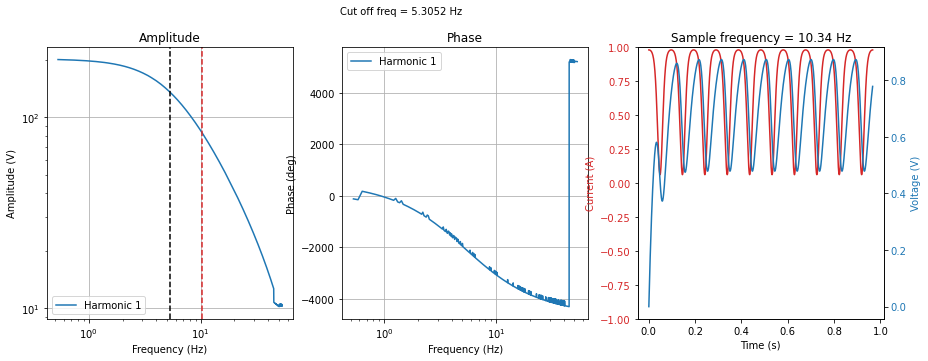

In [8]:
# Run the simulation with the packed inputs
plot_bode_RC(**nice_curve)

In [35]:
inputs

{'R': 1,
 'C': 0.03,
 'Ik': 100.0,
 'offset': 119,
 'amplitude': 12,
 'sample_freq': 4.17}

In [7]:
nice_curve = {'R': 1,
 'C': 0.03,
 'Ik': 31.16,
 'offset': 62,
 'amplitude': 60,
 'sample_freq': 10.34}

In [10]:
def RC_transf(freq, R, C):
    s = 2j * np.pi * freq
    return np.abs(R/(1 + s*R*C))

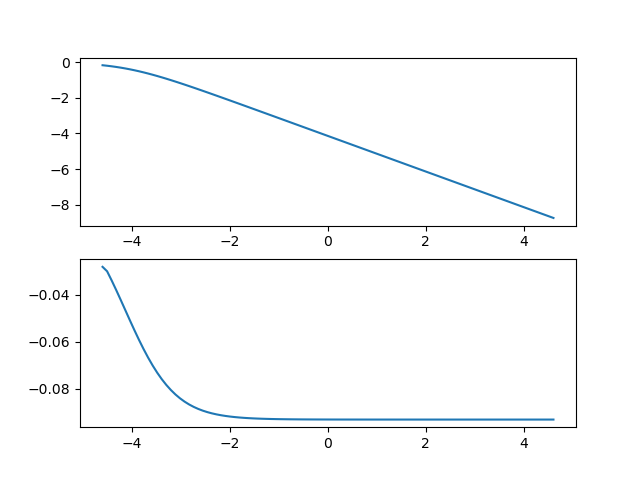

In [30]:
%matplotlib widget
freq = np.logspace(-2, 2, 100)
R = 1
C = 10
fig, ax = plt.subplots(2,1)
ax[0].plot(np.log(freq), np.log(RC_transf(freq, R, C)))
ax[1].plot(np.log(freq), np.gradient(np.log(RC_transf(freq, R, C))))



